In [20]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [21]:
os.chdir("D:/Imarticus/Time Series And Deep Learning")
df=pd.read_csv("D:/Imarticus/Time Series And Deep Learning/Alcohol_Sales.csv",index_col='DATE',parse_dates=True)

In [22]:
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [23]:
df=df.rename(columns={'S4248SM144NCEN': 'Alco'},inplace=False) # Rename the column in simple form

In [17]:
df.isnull().sum()

Alco    0
dtype: int64

In [18]:
df.shape

(325, 1)

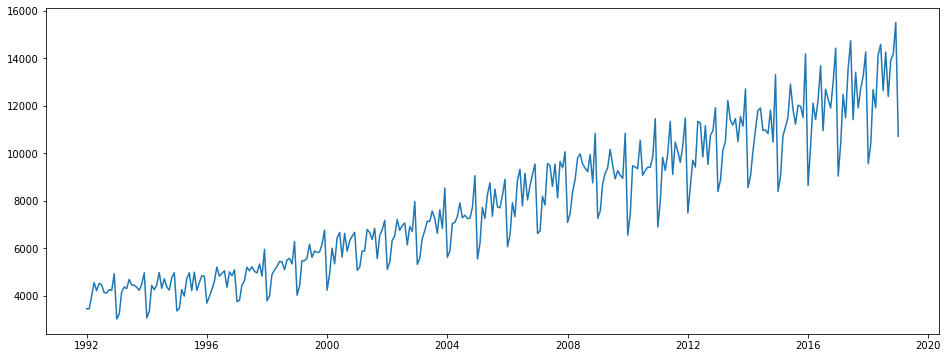

In [24]:
plt.figure(figsize=(16,6))
plt.plot(df.Alco)

### We need to  stationarize the data now as can clearly seen that variance & mean is changing.

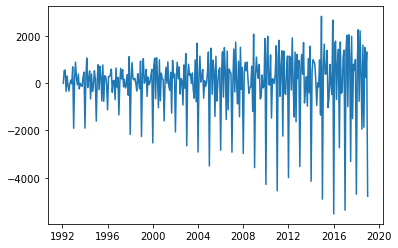

In [25]:
plt.plot(df.diff()) 

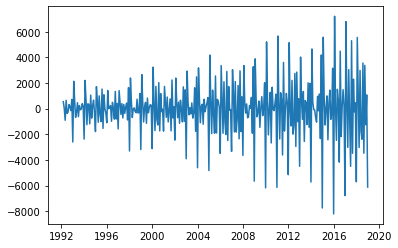

In [26]:
plt.plot(df.diff().diff()) 

In [27]:
df_log=np.log(df)

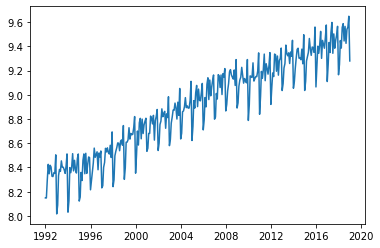

In [28]:
plt.plot(df_log)

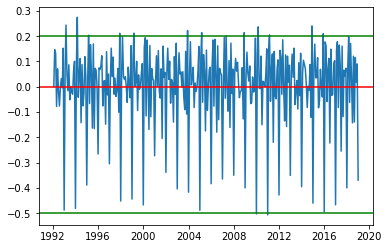

In [34]:
plt.plot(df_log.diff())
plt.axhline(y=0 ,color='r')
plt.axhline(y=.2 ,color='g')
plt.axhline(y=-.5 ,color='g')

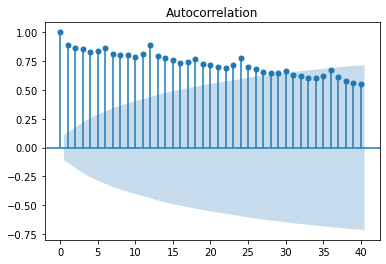

In [36]:
plot_acf(df.Alco,lags=40);

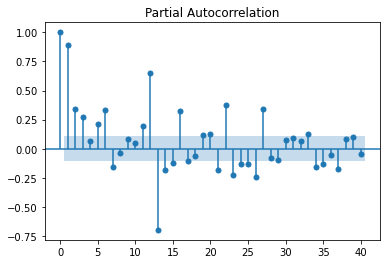

In [37]:
plot_pacf(df.Alco,lags=40);

### We can clearly see the decay out after 2 differencing diff() here from the above graph we can finalize the p values as 2 and we already took I as = 1 

In [38]:
model =ARIMA(df,order=(2,2,0))
result=model.fit();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [39]:
result.params # Params is parameter

const           -5.267083
ar.L1.D2.Alco   -0.947157
ar.L2.D2.Alco   -0.539149
dtype: float64

In [40]:
fore_values= result.forecast(steps=12)

In [41]:
fore_values[0] # To get the forecasted 1st array 

array([11134.82814685,  9908.10091408,  7419.88296794,  6999.52092884,
        5287.61038955,  3671.02093602,  2647.38913622,   997.64537115,
        -391.86015031, -1703.38003606, -3242.16738827, -4620.8381987 ])

In [42]:
forecast_values = result.forecast(steps = 12)

In [43]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df

,0
0,11134.828147
1,9908.100914
2,7419.882968
3,6999.520929
4,5287.610390
5,3671.020936
6,2647.389136
7,997.645371
8,-391.860150
9,-1703.380036


In [44]:
forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True)
forecast_values_df

,Predicted
0,11134.828147
1,9908.100914
2,7419.882968
3,6999.520929
4,5287.610390
5,3671.020936
6,2647.389136
7,997.645371
8,-391.860150
9,-1703.380036


In [45]:
df.tail()

,Alco
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [46]:
date_for_pred = [ '2019-02-01' ,
                 '2019-03-01', '2019-04-01','2019-05-01', 
                 '2019-06-01', '2019-07-01','2019-08-01',
                 '2019-09-01', '2019-10-01','2019-11-01',
                 '2019-12-01','2020-01-01' ]

In [47]:
forecast_values_df  = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [48]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True) 

In [49]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True ) 

In [50]:
forecast_values_df.head()

,Predicted,Month
0,11134.828147,2019-02-01
1,9908.100914,2019-03-01
2,7419.882968,2019-04-01
3,6999.520929,2019-05-01
4,5287.610390,2019-06-01


In [52]:
pred_Alco = forecast_values_df.set_index(['Month'])
pred_Alco.head()

,Predicted
Month,
2019-02-01,11134.828147
2019-03-01,9908.100914
2019-04-01,7419.882968
2019-05-01,6999.520929
2019-06-01,5287.610390


<AxesSubplot:xlabel='Month'>

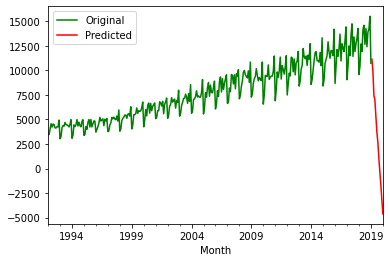

In [54]:
df['Alco'].plot(legend = True , label = "Original" , color ="green")  # original
pred_Alco['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted 

### Train & Test

In [55]:
df.shape

(325, 1)

In [56]:
train=df.iloc[0:300]  # 1st 148 in train
test=df.iloc[300:325]  # Last few records in test

<AxesSubplot:xlabel='DATE'>

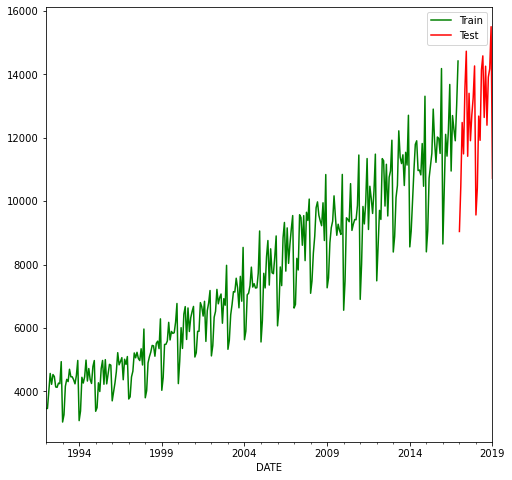

In [57]:
plt.figure(figsize =(8 , 8))
train['Alco'].plot(legend = True , label = "Train" , color ="green")
test['Alco'].plot(legend = True , label = "Test" , color ="red")

In [58]:
auto_arima(df['Alco'], seasonal= True ,m=12)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [60]:
model_sarima=SARIMAX(df['Alco'],order=(3,1,2),seasonal_order=(2, 1, 2, 12))
results= model_sarima.fit() # Model has been Created.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566:

In [64]:
pred_rv=results.predict(start=300,end=324)
pred_rv

2017-01-01     9405.425821
2017-02-01    11096.398330
2017-03-01    12336.590346
2017-04-01    11701.173507
2017-05-01    13118.176201
2017-06-01    13863.011266
2017-07-01    11582.954466
2017-08-01    13739.861669
2017-09-01    12624.239369
2017-10-01    12466.481128
2017-11-01    13450.458192
2017-12-01    14451.041554
2018-01-01     9892.001300
2018-02-01    10655.098604
2018-03-01    12220.407974
2018-04-01    11987.719891
2018-05-01    14163.134437
2018-06-01    14655.850042
2018-07-01    12319.939394
2018-08-01    13699.343553
2018-09-01    12428.245236
2018-10-01    13778.316712
2018-11-01    13562.657612
2018-12-01    14997.899206
2019-01-01    10686.495455
Freq: MS, Name: predicted_mean, dtype: float64

In [65]:
len(pred_rv)

25

In [66]:
test.shape

(25, 1)

Note :- Predicted and test length shouls be same.

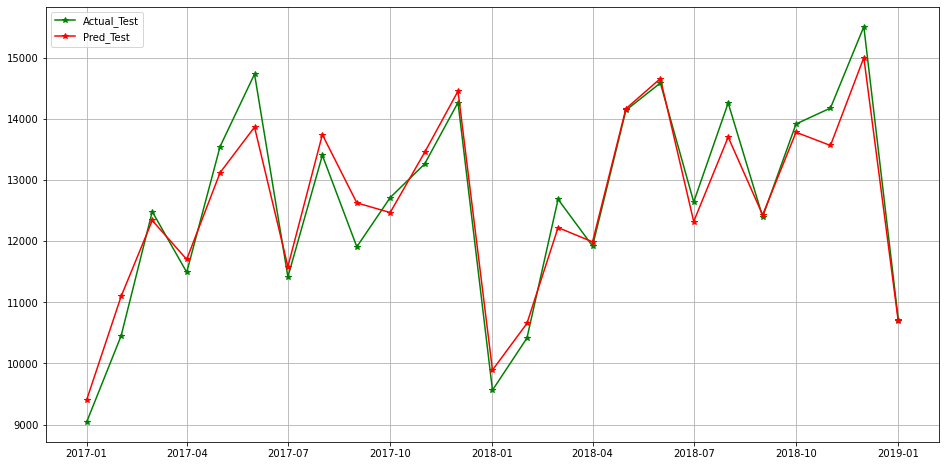

In [67]:
plt.figure(figsize=(16,8))
plt.plot(test.Alco,marker="*",color="g",label="Actual_Test")
plt.plot(pred_rv,color="r",label="Pred_Test",marker="*")
plt.legend()
plt.grid()

### Now we will see the Error terms 

In [68]:
error=test.Alco-pred_rv
error

DATE
2017-01-01   -362.425821
2017-02-01   -644.398330
2017-03-01    144.409654
2017-04-01   -210.173507
2017-05-01    426.823799
2017-06-01    866.988734
2017-07-01   -166.954466
2017-08-01   -337.861669
2017-09-01   -717.239369
2017-10-01    244.518872
2017-11-01   -189.458192
2017-12-01   -186.041554
2018-01-01   -328.001300
2018-02-01   -240.098604
2018-03-01    462.592026
2018-04-01    -68.719891
2018-05-01    -25.134437
2018-06-01    -72.850042
2018-07-01    320.060606
2018-08-01    557.656447
2018-09-01    -32.245236
2018-10-01    135.683288
2018-11-01    611.342388
2018-12-01    506.100794
2019-01-01     31.504545
dtype: float64

In [69]:
MSE = np.mean(np.square(error))
MSE

151434.11441224057

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(test.Alco,pred_rv)
rmse=sqrt(mse)

In [73]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)

Mean_Squared_Error: 151434.11441224057
Root_Mean_Sqaured_Erro: 389.14536411505736
